In [469]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import Tracer; debug=Tracer()

In [470]:


def gabor(x,k0,a,b):
    return (a/((np.pi**(1/2))*b))*np.exp(-x**2/4*b**2)*np.cos(k0*x)

def signal(x, d):
    return np.exp(-x**2/4*d**2)*(1/(2*np.pi**(1/2)*d))

def noise(x):
    return 0.01*np.random.rand(len(np.asarray(x)))

def integral(f,A,B,M):
    delta=(B-A)/M
    return (f(np.linspace(A,B,M))*delta).sum()
    
    

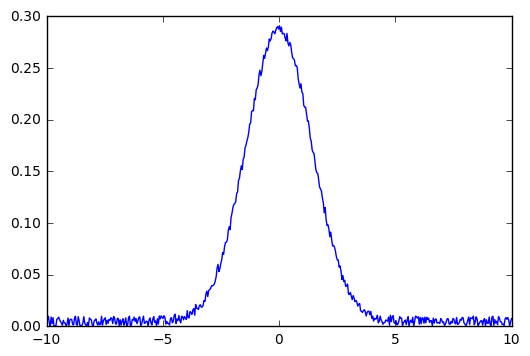

In [471]:
plt.plot(x,signal(x,1)+noise(x))
plt.show()

In [472]:
f=lambda x: x
integral(f, 0,2,1000)

2.0

In [473]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# params 
class Config():
    
    tau=10
    deltat=10**(-2)
    t_start=0
    t_end=100
    @property 
    def T(self):
        return int((self.t_end-self.t_start)/self.deltat)
    a=1
    b=0.6
    d=2
    k0=4
    A=-10
    B=10
    M=500
    noise=False
    @property
    def t(self):
        return np.linspace(self.t_start,self.t_end,self.T)
    @property
    def x(self):
        return np.linspace(self.A,self.B,self.M)
    @property
    def w(self):
        return lambda x: gabor(x,self.k0,self.a,self.b)
    @property
    def s(self):
        return lambda x,t: signal(x,self.d)

    
class Model():
    
    def calculate_S(self,c):
        
        S=np.zeros((c.M,c.T))
        for i,x_i in enumerate(c.x):
            S[i,:]=c.s(x_i,c.t)+c.noise*noise([x_i])
        self.S=S

        
    def calculate_W(self,c):
        
        W=np.zeros((c.M,c.M))
        for i,x_i in enumerate(c.x):
            for j,x_j in enumerate(c.x):
                W[i,j]=w(x_i-x_j)
        self.W=W
   

    def calculate_U(self,c):
        U=np.zeros((c.M,c.T))
        for i in range(c.T-1):
            U[:,i+1]=U[:,i]+(deltat/tau)*(-U[:,i]+self.W.dot(U[:,i]*c.deltat)+self.S[:,i])
        self.U=U
        
    def plot_U(self,c,title):
        fig = plt.figure(figsize=(16,12))
        ax = fig.add_subplot(111, projection='3d')
        
        t_plot=c.t[::500]
        u_plot=self.U[:,::500]
        
        X, Y = np.meshgrid(c.x,t_plot)

        ax.plot_surface(Y, X, u_plot.T, rstride=1, cstride=1, cmap=cm.coolwarm,
                               linewidth=0, antialiased=False)


        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        
        ax.set_xlabel('Time, $t$',fontsize=16)
        ax.set_ylabel('Space, $x$',fontsize=16)
        ax.set_zlabel('Response, $u$' ,fontsize=16)
        ax.set_title(title ,fontsize=20)
        
    def plot_S(self,c,title):
        fig = plt.figure(figsize=(16,12))
        ax = fig.add_subplot(111, projection='3d')
        
        t_plot=c.t[::500]
        S_plot=self.S[:,::500]
        
        X,Y = np.meshgrid(c.x,t_plot)

        ax.plot_surface(Y,X, S_plot.T, rstride=1, cstride=1, cmap=cm.coolwarm,
                               linewidth=0, antialiased=False)


        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        
        ax.set_xlabel('Time, $t$',fontsize=16)
        ax.set_ylabel('Space, $x$',fontsize=16)
        ax.set_zlabel('Signal, $s$' ,fontsize=16)
        ax.set_title(title ,fontsize=20)
    

In [474]:
c=Config()
model=Model()

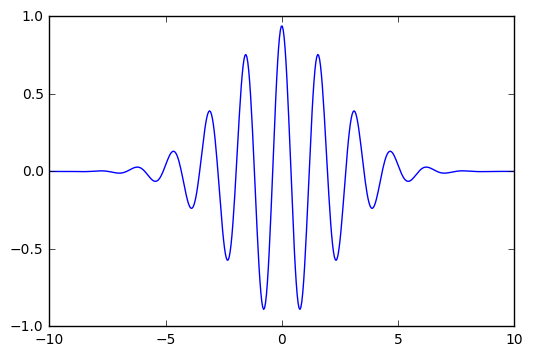

In [475]:
plt.plot(c.x,c.w(c.x))
plt.show()

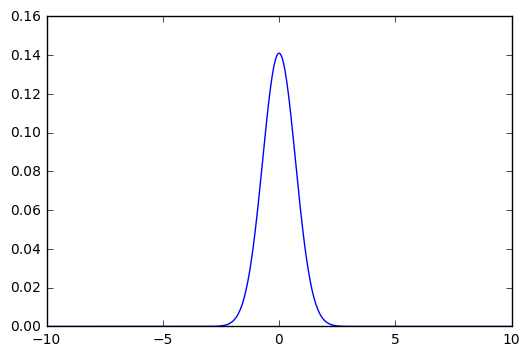

In [476]:
plt.plot(c.x,c.s(c.x,c.t))
plt.show()

In [477]:
model.calculate_S(c)
model.calculate_W(c)
model.calculate_U(c)

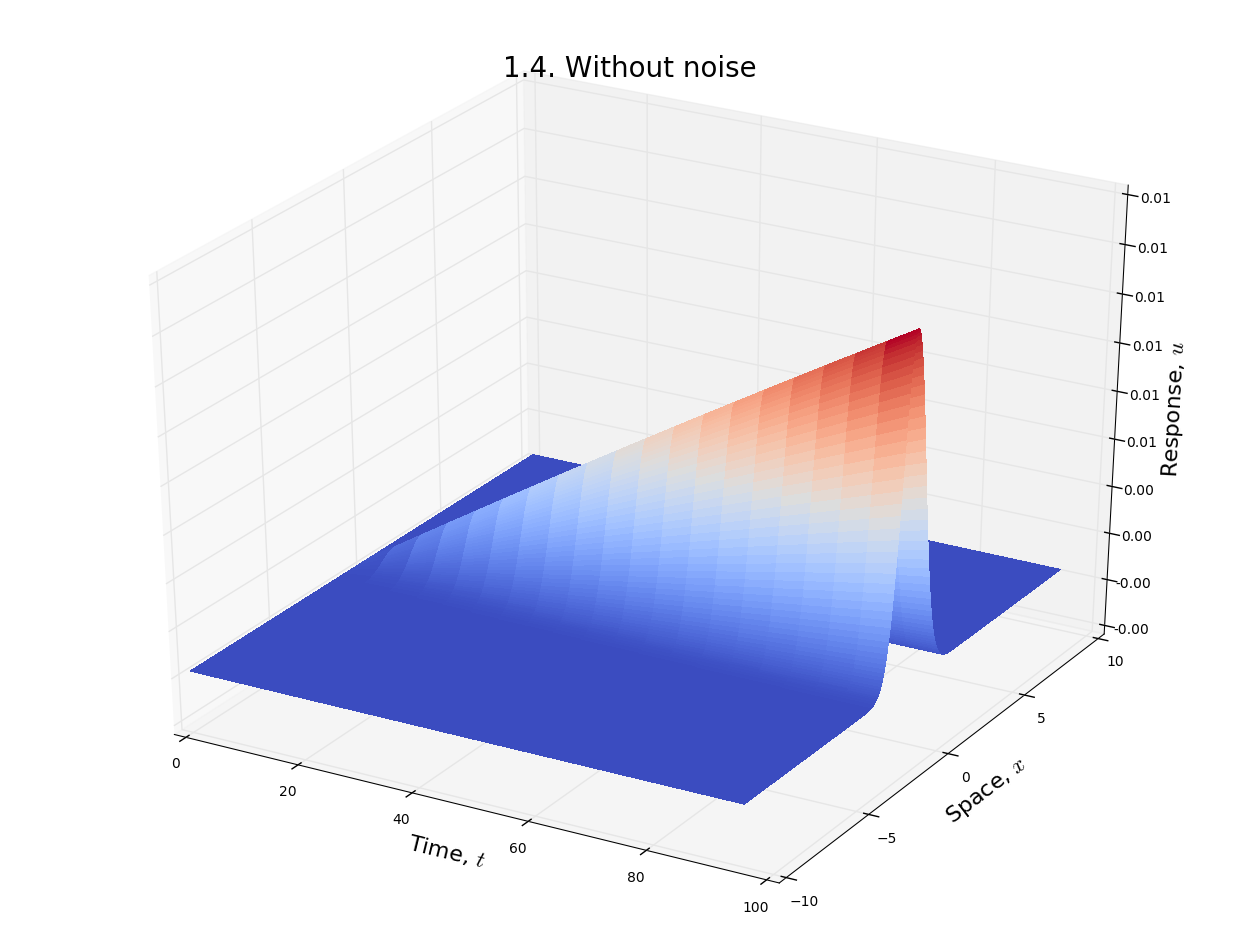

In [478]:
model.plot_U(c,"1.4. Without noise")
plt.show()

Now we add Gaussian noise to our signal. 

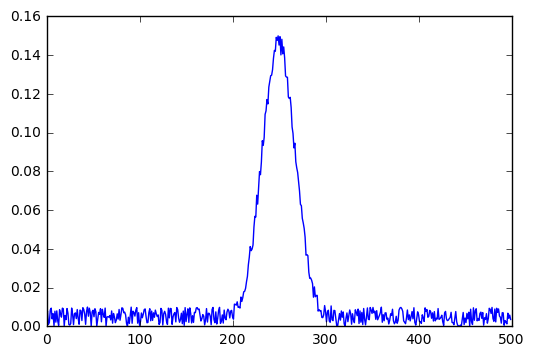

In [479]:
c.noise=True
model.calculate_S(c)
plt.plot(model.S[:,0])
plt.show()

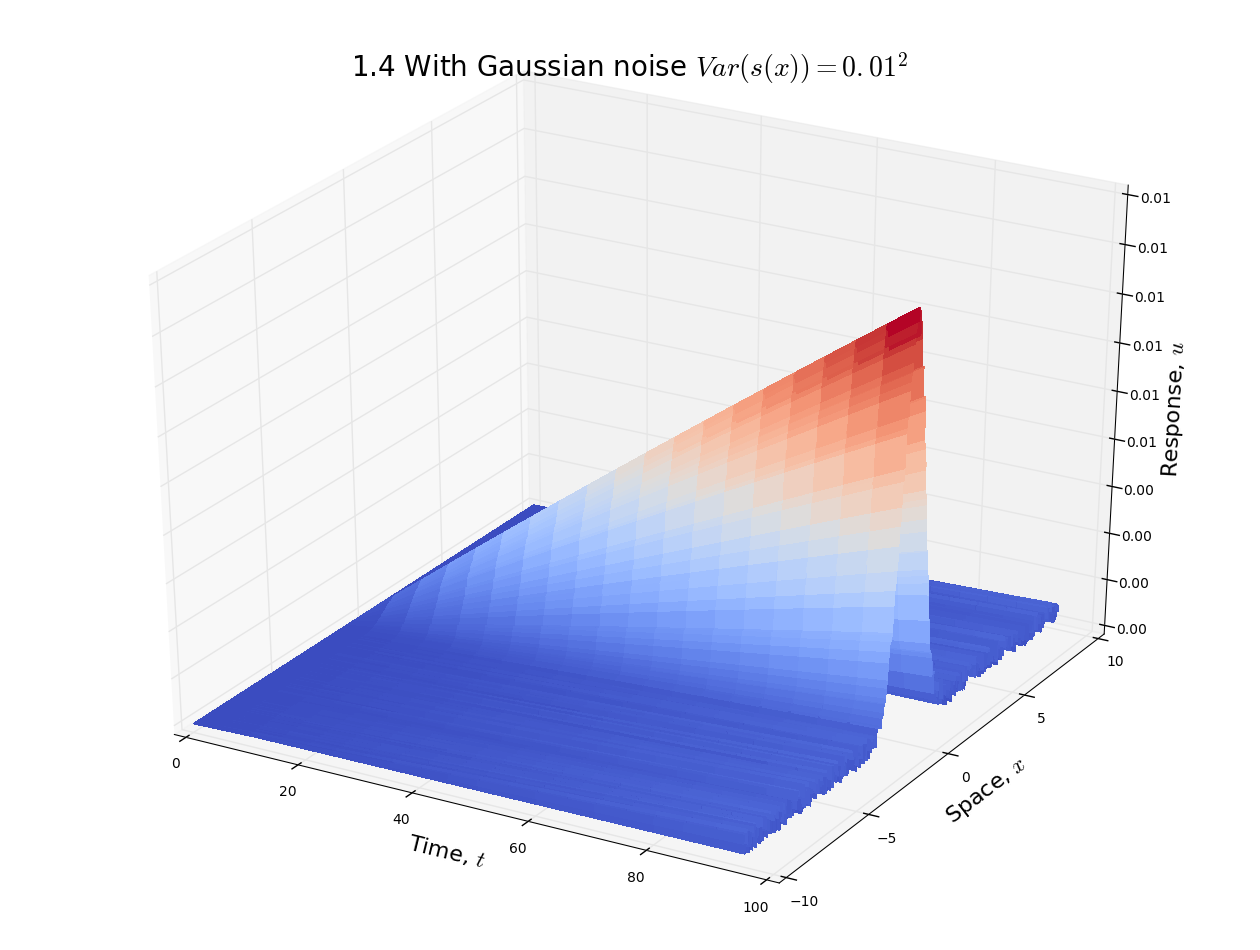

In [480]:
model.calculate_U(c)
model.plot_U(c,"1.4 With Gaussian noise $Var(s(x))=0.01^2$")
plt.show()

Change the parameter $a$

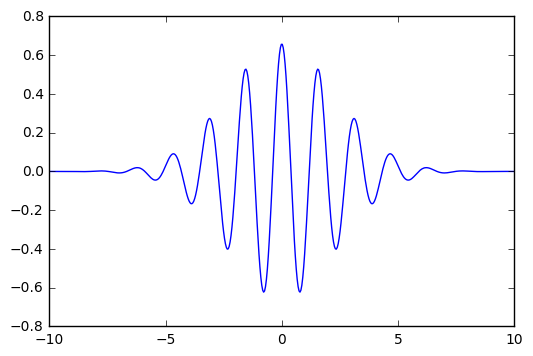

In [481]:
c.a=0.7
plt.plot(c.x,c.w(c.x))
plt.show()

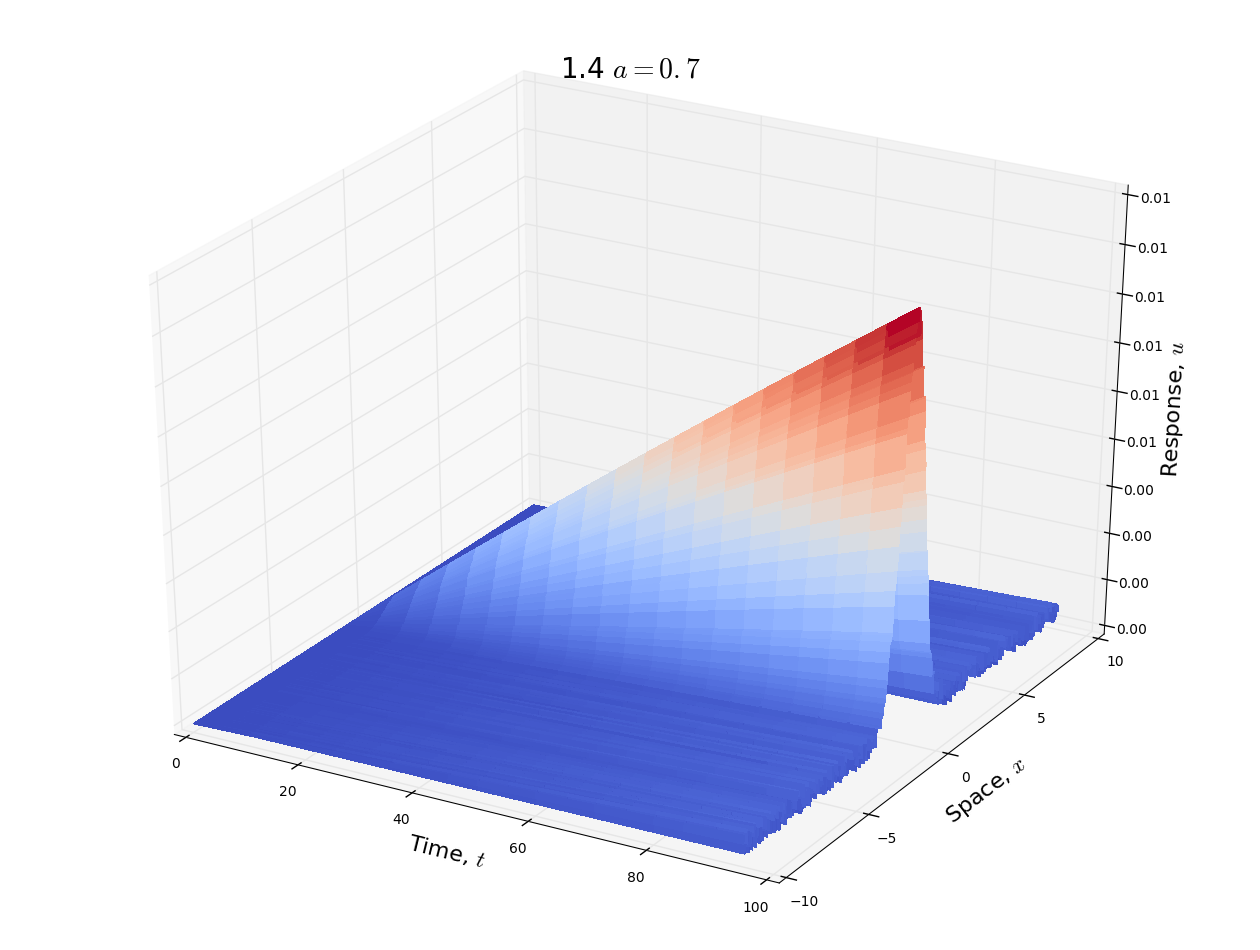

In [482]:
model.calculate_W(c)
model.plot_U(c, "1.4 $a=0.7$")
plt.show()

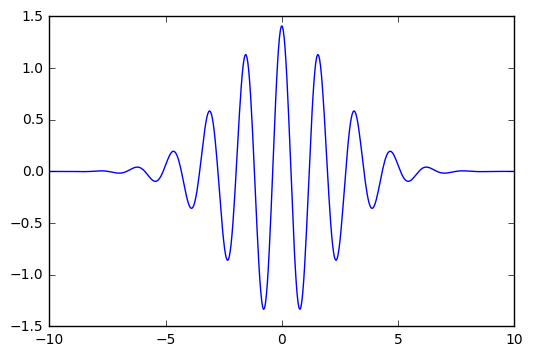

In [483]:
c.a=1.5
plt.plot(c.x,c.w(c.x))
plt.show()

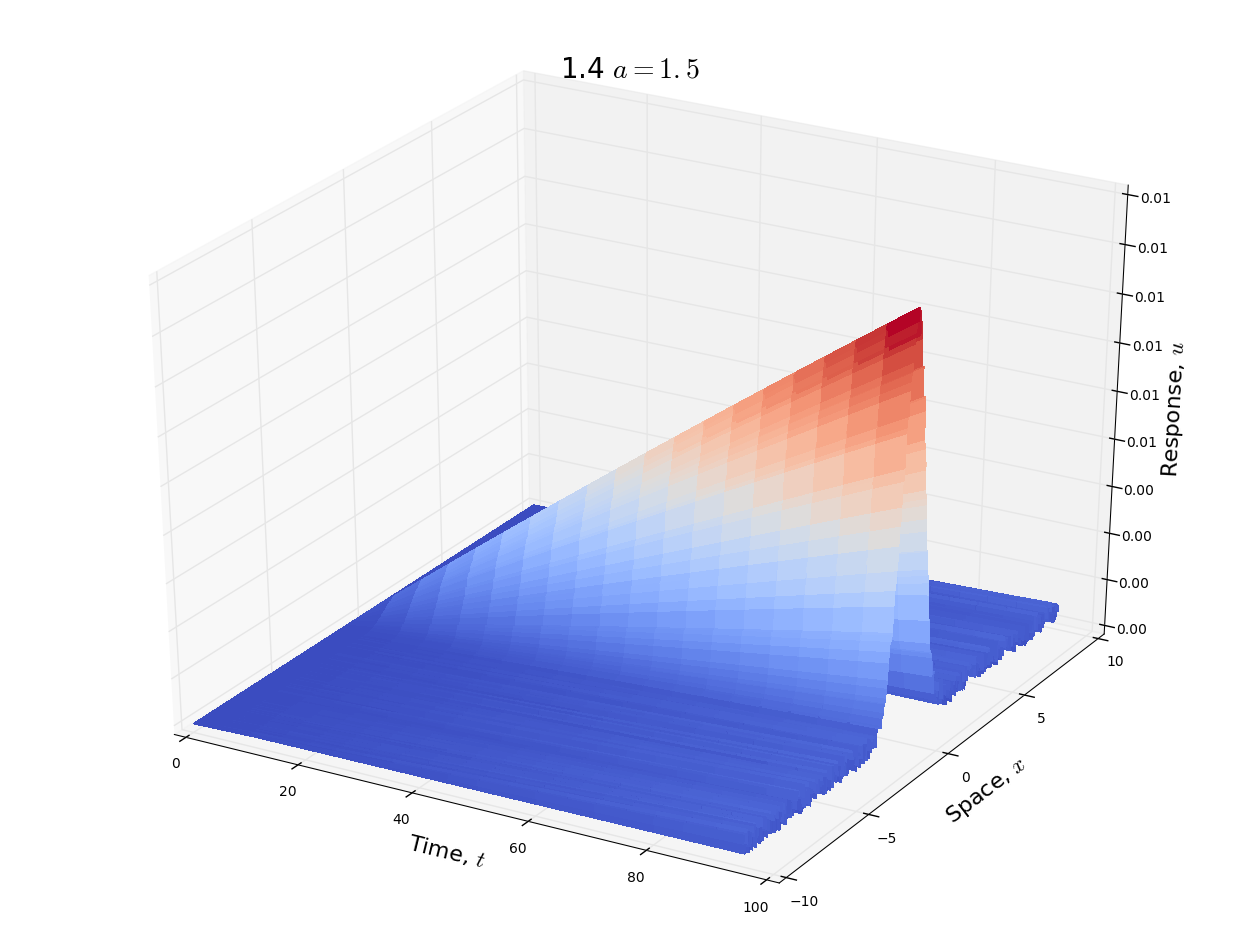

In [484]:
model.calculate_W(c)
model.plot_U(c, "1.4 $a=1.5$")
plt.show()

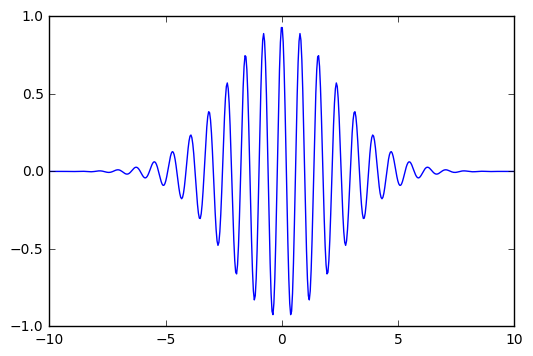

In [485]:
c.a=1
c.k0=8
plt.plot(c.x,c.w(c.x))
plt.show()

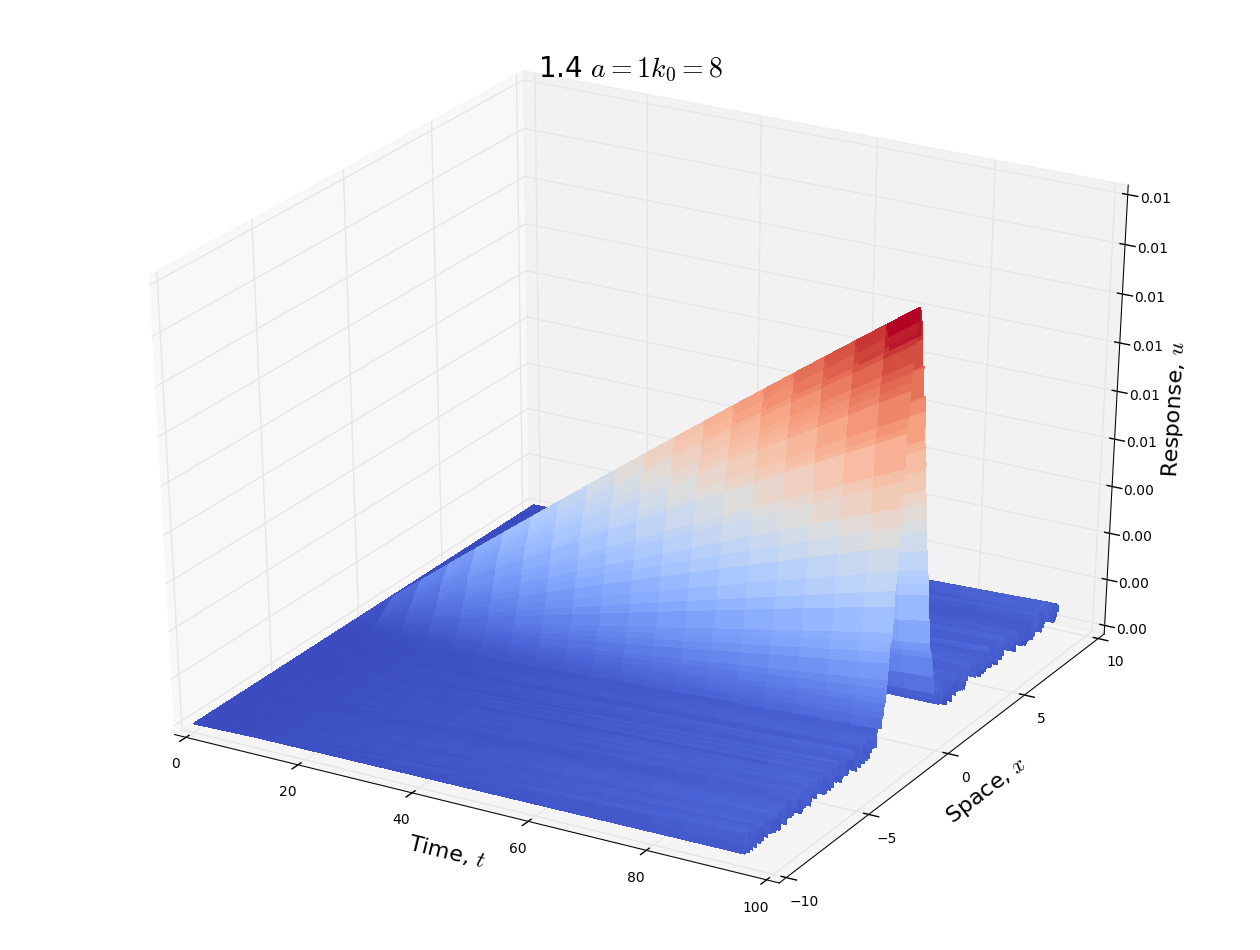

In [486]:
model.calculate_W(c)
model.plot_U(c, "1.4 $a=1 k_0=8$")
plt.show()

### 1.6

In [487]:
def signal_2(x,t,c,v,d1):
    return c*np.exp(-(x-v*t)**2/(4*d1**2))/(2*np.pi**(1/2)*d1)
 
def kernel(x,c):
    return np.exp(-c*np.abs(x))*np.sign(x)


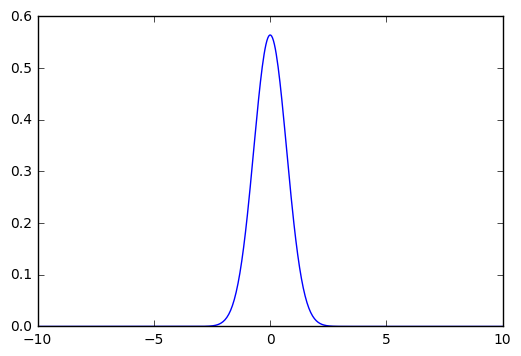

True

In [488]:
c=Config()
c.c=1
c.d1=0.5
c.v=0.1

c.s=lambda x,t: signal_2(x,t,c.c,c.v,c.d1)
c.w=lambda x: kernel(x,c.c)
plt.plot(c.x,c.s(c.x,0))
plt.show()

c.s(1,0)==1/(np.e*np.pi**(1/2))

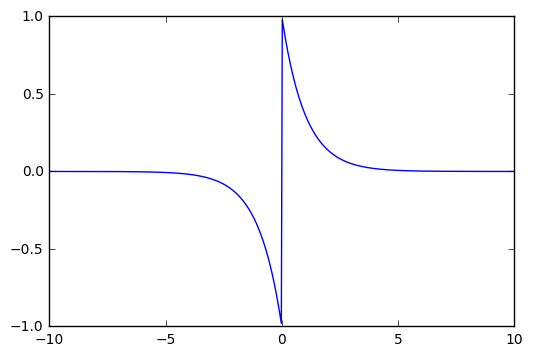

In [489]:
plt.plot(c.x,c.w(c.x))
plt.show()

In [490]:
model2=Model()
model2.calculate_S(c)
model2.calculate_W(c)
model2.calculate_U(c)

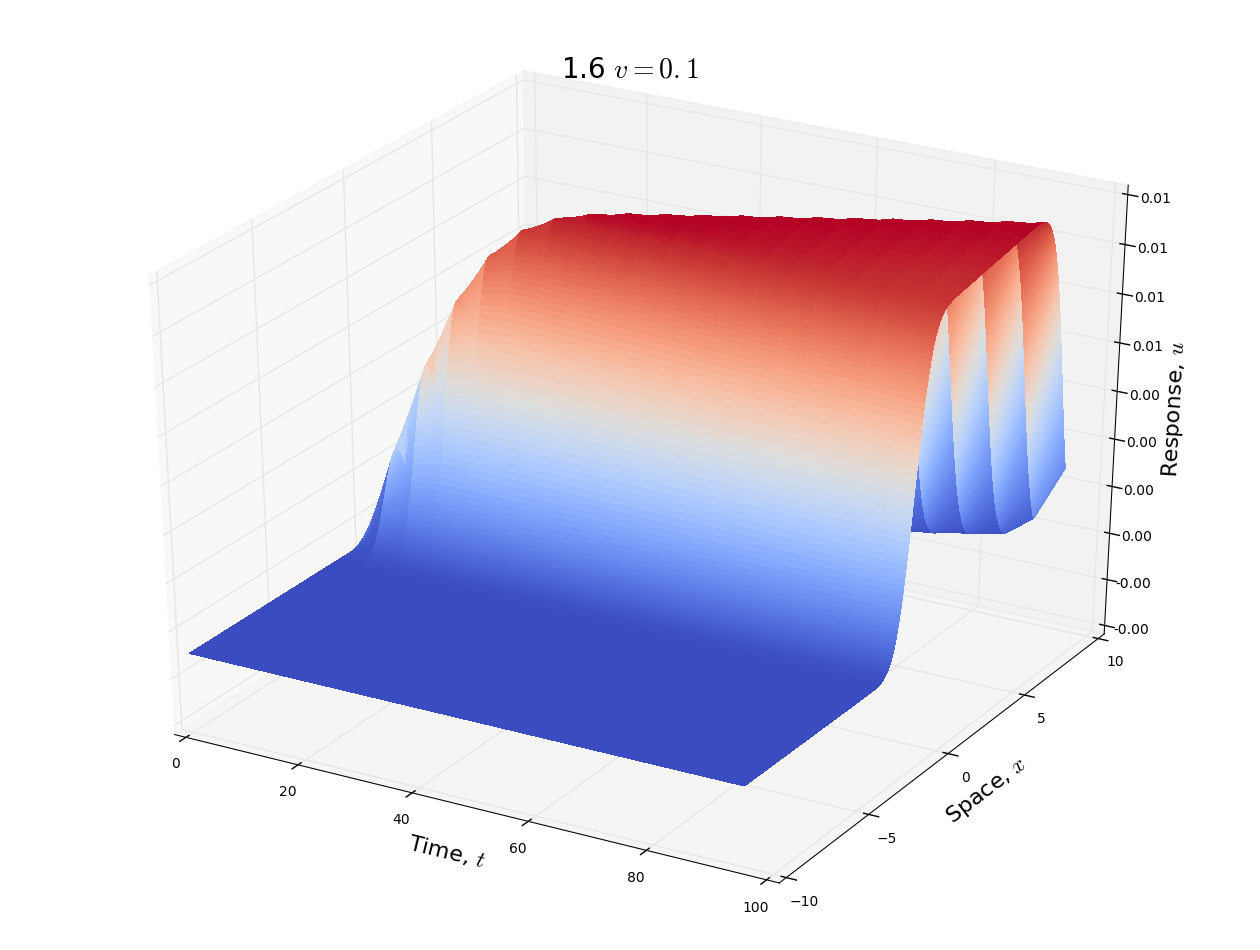

In [491]:
model2.plot_U(c,"1.6 $v=0.1$")
plt.show()

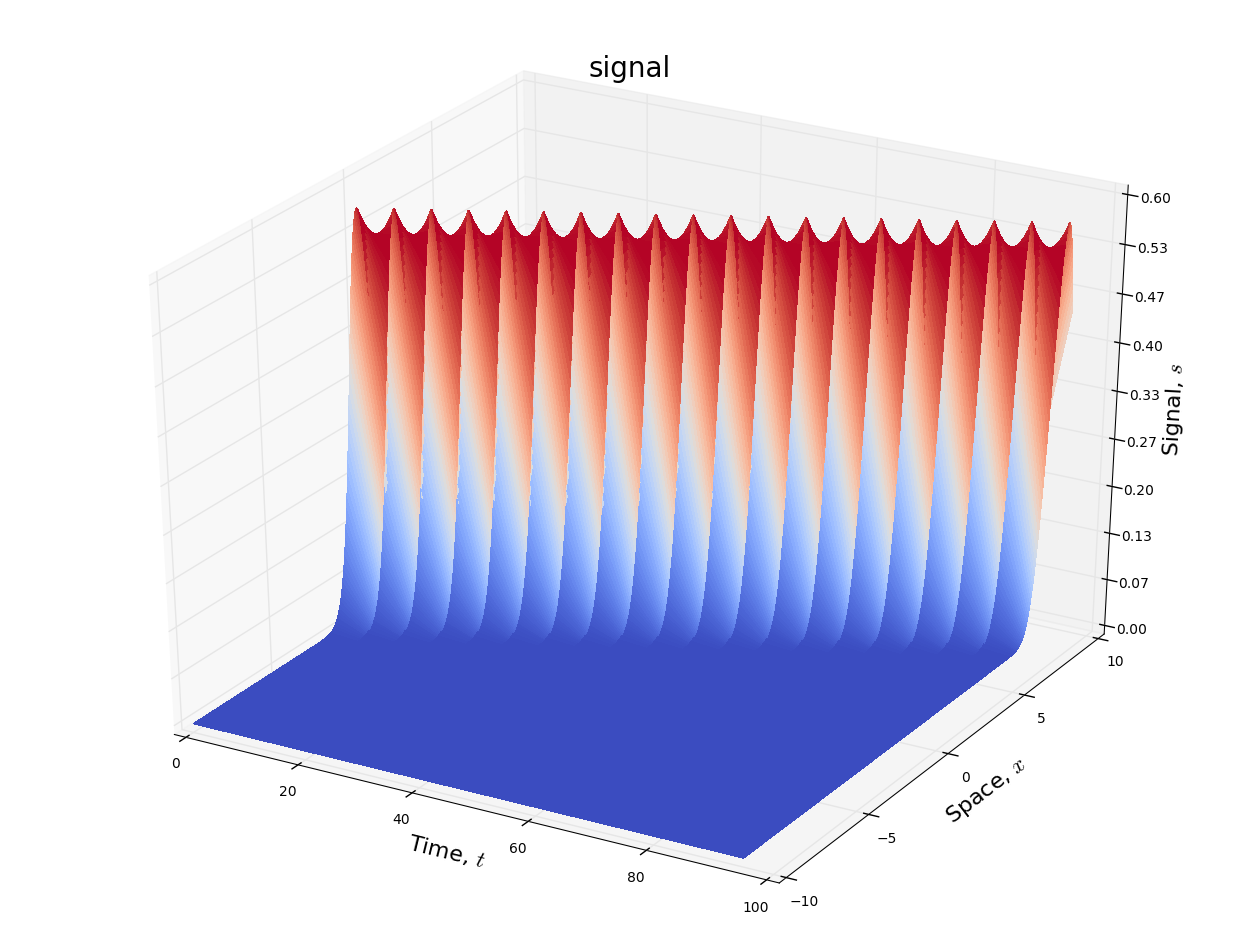

In [492]:
model2.plot_S(c, "signal")
plt.show()

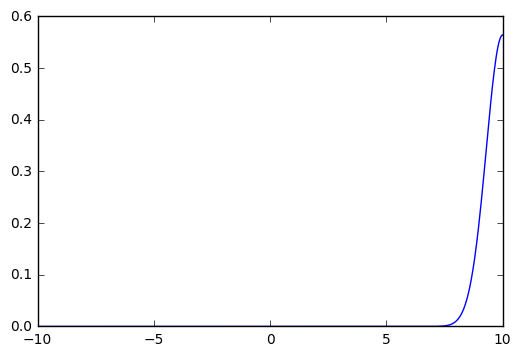

In [493]:
plt.plot(c.x,model2.S[:,-1])
plt.show()

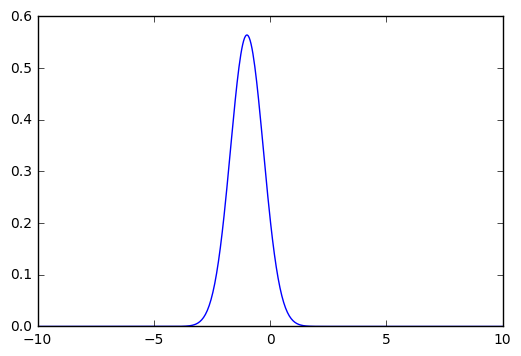

In [494]:

c.v=-0.1
c.s=lambda x,t: signal_2(x,t,c.c,c.v,c.d1)

plt.plot(c.x,c.s(c.x,10))
plt.show()

In [495]:
model2=Model()
model2.calculate_S(c)
model2.calculate_W(c)
model2.calculate_U(c)

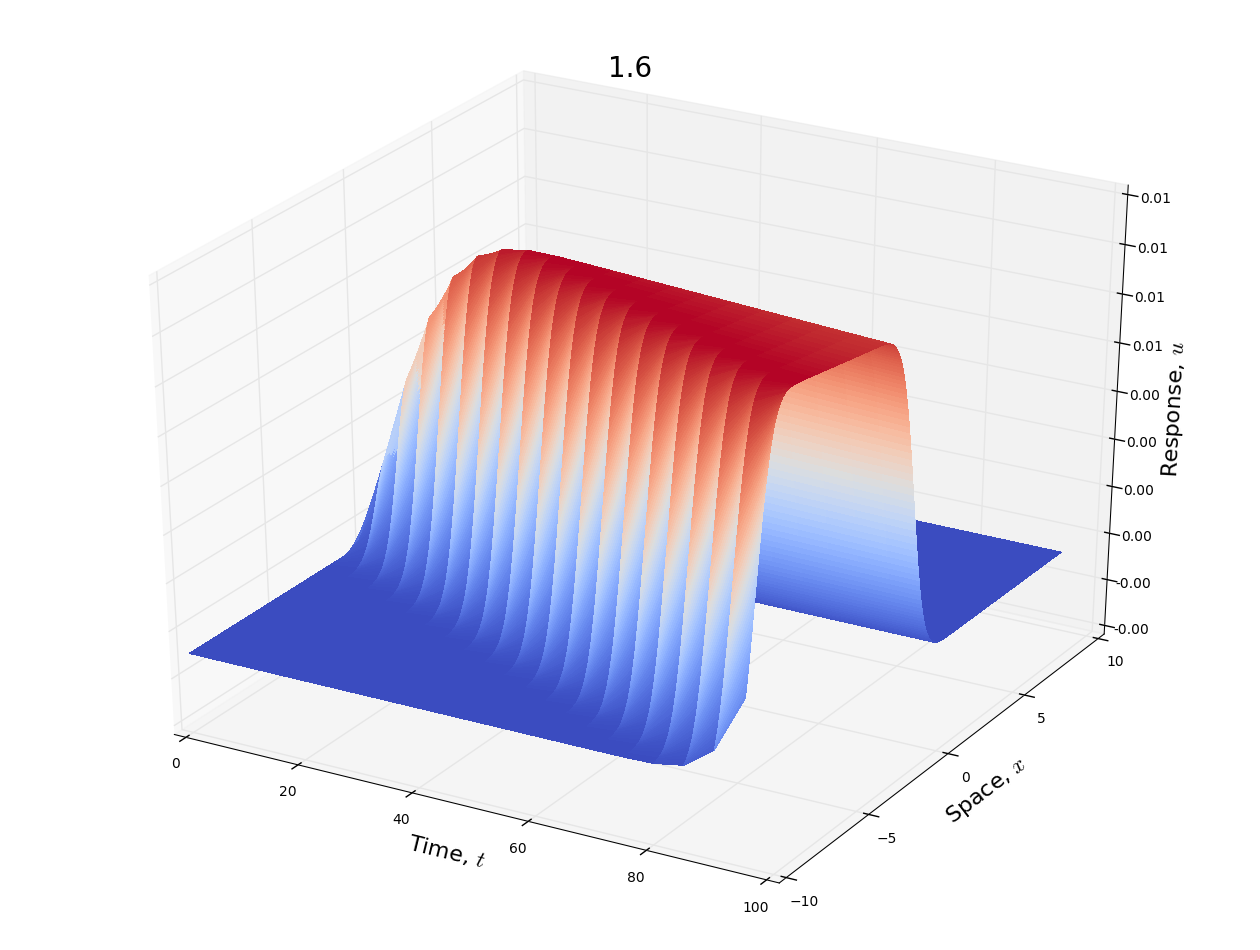

In [496]:
model2.plot_U(c,"1.6")
plt.show()